# Setting Up the Data

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json

sns.set_theme()

In [11]:
# BUSINESS DATA

# Read json file
business = pd.read_json('yelp_academic_dataset_business.json', lines=True)
# Remove superfluous data
business = business.drop(columns=['name', 'address', 'city', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'hours'])

# Only keep businesses in the 'Restaurants' category
business = business[business['categories'].str.contains('Restaurants', na = False)]
# Remove restaurants that are not in the US
business = business[(business['state'] != "ABE") & (business['state'] != "BC")]

business.head()

business_id state  is_open  \
0   6iYb2HFDywm3zjuRg0shjw    CO        1   
1   tCbdrRPZA0oiIYSmHG3J0w    OR        1   
7   jFYIsSb7r1QeESVUnXPHBw    OH        1   
12  HPA_qyMEddpAEtFof02ixg    MA        1   
13  ufCxltuh56FF4-ZFZ6cVhg    FL        1   

                                           attributes  \
0   {'RestaurantsTableService': 'True', 'WiFi': 'u...   
1   {'RestaurantsTakeOut': 'True', 'RestaurantsAtt...   
7                                                None   
12  {'RestaurantsGoodForGroups': 'True', 'HasTV': ...   
13  {'BusinessParking': '{'garage': False, 'street...   

                                           categories  
0   Gastropubs, Food, Beer Gardens, Restaurants, B...  
1   Salad, Soup, Sandwiches, Delis, Restaurants, C...  
7                     Breakfast & Brunch, Restaurants  
12                           Food, Pizza, Restaurants  
13  Restaurants, American (New), Bakeries, Dessert...

# Analyzing Restaurant Closures Given Attributes

In [12]:
bus_rev_csv_path = 'busrev_dataframe.csv'
bus_rev = pd.read_csv(bus_rev_csv_path)
bus_rev.head()

state  is_open                                         attributes  \
0    OH        1  {'Ambience': "{'touristy': False, 'hipster': F...   
1    OR        1  {'RestaurantsPriceRange2': '3', 'BusinessParki...   
2    MA        1  {'RestaurantsAttire': "u'casual'", 'Alcohol': ...   
3    GA        1  {'GoodForKids': 'True', 'BusinessAcceptsCredit...   
4    GA        1  {'BikeParking': 'False', 'DriveThru': 'False',...   

                                          categories                 date  \
0    American (Traditional), Restaurants, Gastropubs  2021-01-27 02:15:07   
1                French, Restaurants, American (New)  2020-12-17 17:35:28   
2  Food Trucks, Food, Street Vendors, Food Stands...  2021-01-22 14:07:27   
3  Food, Restaurants, Juice Bars & Smoothies, Hea...  2020-06-02 23:24:14   
4                               Restaurants, Burgers  2020-11-22 15:33:49   

  month-year  
0    2021-01  
1    2020-12  
2    2021-01  
3    2020-06  
4    2020-11

In [13]:
business_no_na = business.dropna() # need restaurants with listed attributes
bus_rev_no_na = bus_rev.dropna() # need restaurants with listed attributes
business_no_na['attributes'] = business_no_na['attributes'].astype(str) # transorm dict to str
bus_rev_no_na['attributes'] = bus_rev_no_na['attributes'].astype(str) # transorm dict to str

merged_bus_rev = pd.merge(business_no_na,bus_rev_no_na, on="attributes")
merged_bus_rev.head()

<ipython-input-13-bf1652ffa63d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_no_na['attributes'] = business_no_na['attributes'].astype(str) # transorm dict to str
<ipython-input-13-bf1652ffa63d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_rev_no_na['attributes'] = bus_rev_no_na['attributes'].astype(str) # transorm dict to str


business_id state_x  is_open_x  \
0  6iYb2HFDywm3zjuRg0shjw      CO          1   
1  tCbdrRPZA0oiIYSmHG3J0w      OR          1   
2  HPA_qyMEddpAEtFof02ixg      MA          1   
3  ufCxltuh56FF4-ZFZ6cVhg      FL          1   
4  GfWJ19Js7wX9rwaHQ7KbGw      FL          1   

                                          attributes  \
0  {'RestaurantsTableService': 'True', 'WiFi': "u...   
1  {'RestaurantsTakeOut': 'True', 'RestaurantsAtt...   
2  {'RestaurantsGoodForGroups': 'True', 'HasTV': ...   
3  {'BusinessParking': "{'garage': False, 'street...   
4  {'HasTV': 'False', 'Caters': 'False', 'Busines...   

                                        categories_x state_y  is_open_y  \
0  Gastropubs, Food, Beer Gardens, Restaurants, B...      CO          1   
1  Salad, Soup, Sandwiches, Delis, Restaurants, C...      OR          1   
2                           Food, Pizza, Restaurants      MA          1   
3  Restaurants, American (New), Bakeries, Dessert...      FL          1   
4  Restaurants, American (New), Food Court, Flowe...      FL          1   

                                        categories_y                 date  \
0  Gastropubs, Food, Beer Gardens, Restaurants, B...  2021-01-22 05:20:38   
1  Salad, Soup, Sandwiches, Delis, Restaurants, C...  2020-08-06 09:00:59   
2                           Food, Pizza, Restaurants  2020-09-18 05:12:38   
3  Restaurants, American (New), Bakeries, Dessert...  2020-12-29 16:25:19   
4  Restaurants, American (New), Food Court, Flowe...  2020-09-18 17:36:45   

  month-year  
0    2021-01  
1    2020-08  
2    2020-09  
3    2020-12  
4    2020-09

In [14]:
merged_bus_rev['attributes'] = merged_bus_rev['attributes'].map(eval)
merged_bus_rev.head()

business_id state_x  is_open_x  \
0  6iYb2HFDywm3zjuRg0shjw      CO          1   
1  tCbdrRPZA0oiIYSmHG3J0w      OR          1   
2  HPA_qyMEddpAEtFof02ixg      MA          1   
3  ufCxltuh56FF4-ZFZ6cVhg      FL          1   
4  GfWJ19Js7wX9rwaHQ7KbGw      FL          1   

                                          attributes  \
0  {'RestaurantsTableService': 'True', 'WiFi': 'u...   
1  {'RestaurantsTakeOut': 'True', 'RestaurantsAtt...   
2  {'RestaurantsGoodForGroups': 'True', 'HasTV': ...   
3  {'BusinessParking': '{'garage': False, 'street...   
4  {'HasTV': 'False', 'Caters': 'False', 'Busines...   

                                        categories_x state_y  is_open_y  \
0  Gastropubs, Food, Beer Gardens, Restaurants, B...      CO          1   
1  Salad, Soup, Sandwiches, Delis, Restaurants, C...      OR          1   
2                           Food, Pizza, Restaurants      MA          1   
3  Restaurants, American (New), Bakeries, Dessert...      FL          1   
4  Restaurants, American (New), Food Court, Flowe...      FL          1   

                                        categories_y                 date  \
0  Gastropubs, Food, Beer Gardens, Restaurants, B...  2021-01-22 05:20:38   
1  Salad, Soup, Sandwiches, Delis, Restaurants, C...  2020-08-06 09:00:59   
2                           Food, Pizza, Restaurants  2020-09-18 05:12:38   
3  Restaurants, American (New), Bakeries, Dessert...  2020-12-29 16:25:19   
4  Restaurants, American (New), Food Court, Flowe...  2020-09-18 17:36:45   

  month-year  
0    2021-01  
1    2020-08  
2    2020-09  
3    2020-12  
4    2020-09

In [15]:
attributes = merged_bus_rev["attributes"].apply(pd.Series )
attributes.head()

#print(attributes.columns)

#ByAppointmentOnly
#OutdoorSeating
#BusinessAcceptsCreditCards
#Caters
#RestaurantsTakeOut
#RestaurantsDelivery
#DriveThru
#RestaurantsCounterService
#RestaurantsTableService

attributes_useful = attributes.drop(columns=[
    'WiFi', 'BikeParking', 'BusinessParking', 'WheelchairAccessible', 'RestaurantsGoodForGroups', 'HappyHour', 
    'BusinessAcceptsBitcoin', 'RestaurantsPriceRange2', 'Ambience','HasTV', 'Alcohol', 'GoodForMeal',
       'DogsAllowed', 'NoiseLevel','GoodForKids', 'Music',
       'GoodForDancing', 'BestNights', 'CoatCheck', 'Smoking',
       'Corkage', 'BYOB', 'BYOBCorkage',
       'AgesAllowed', 'Open24Hours', 'AcceptsInsurance', 'DietaryRestrictions',
       'HairSpecializesIn', 'RestaurantsAttire'])

bus_rev_attributes = pd.concat([merged_bus_rev, attributes_useful], axis=1).drop('attributes', axis=1)
bus_rev_attributes.head()

business_id state_x  is_open_x  \
0  6iYb2HFDywm3zjuRg0shjw      CO          1   
1  tCbdrRPZA0oiIYSmHG3J0w      OR          1   
2  HPA_qyMEddpAEtFof02ixg      MA          1   
3  ufCxltuh56FF4-ZFZ6cVhg      FL          1   
4  GfWJ19Js7wX9rwaHQ7KbGw      FL          1   

                                        categories_x state_y  is_open_y  \
0  Gastropubs, Food, Beer Gardens, Restaurants, B...      CO          1   
1  Salad, Soup, Sandwiches, Delis, Restaurants, C...      OR          1   
2                           Food, Pizza, Restaurants      MA          1   
3  Restaurants, American (New), Bakeries, Dessert...      FL          1   
4  Restaurants, American (New), Food Court, Flowe...      FL          1   

                                        categories_y                 date  \
0  Gastropubs, Food, Beer Gardens, Restaurants, B...  2021-01-22 05:20:38   
1  Salad, Soup, Sandwiches, Delis, Restaurants, C...  2020-08-06 09:00:59   
2                           Food, Pizza, Restaurants  2020-09-18 05:12:38   
3  Restaurants, American (New), Bakeries, Dessert...  2020-12-29 16:25:19   
4  Restaurants, American (New), Food Court, Flowe...  2020-09-18 17:36:45   

  month-year RestaurantsTableService BusinessAcceptsCreditCards  \
0    2021-01                    True                       True   
1    2020-08                     NaN                       True   
2    2020-09                   False                       True   
3    2020-12                     NaN                       True   
4    2020-09                     NaN                       True   

  RestaurantsReservations Caters OutdoorSeating RestaurantsTakeOut  \
0                   False   True           True               True   
1                   False   True          False               True   
2                   False   True           True               True   
3                     NaN   True            NaN               True   
4                   False  False            NaN               None   

  RestaurantsDelivery ByAppointmentOnly DriveThru RestaurantsCounterService  
0                None               NaN       NaN                       NaN  
1               False             False       NaN                       NaN  
2                True               NaN       NaN                       NaN  
3               False               NaN       NaN                       NaN  
4                None               NaN       NaN                       NaN

In [72]:
# Previous function: new function below
def compareAttributeClosures(dataframe, attribute_name):
    # Make two separate dataframes for restaurants that have the attribute and restaurants that don't
    has_attribute = dataframe[dataframe[attribute_name] == "True"]
    has_no_attribute = dataframe[dataframe[attribute_name] == "False"]
    missing_attribute = dataframe[dataframe[attribute_name].isnull()]
    
    # Restaurants that have the attribute
    group_date_attribute = len(has_attribute[has_attribute['is_open_x'] == 0])
    closed_date_attribute = has_attribute[has_attribute['is_open_x'] == 0].groupby('month-year').count()
    closed_attribute = (closed_date_attribute / group_date_attribute) * 100

    closed_attribute.reset_index(inplace=True)
    c = sns.catplot(data= closed_attribute, x="is_open_x", y="month-year", height= 5, color = "red", kind="bar")
    c.set(xlabel='Restaurant Closures (%)', ylabel='Last Review Date (Year-Month)', title='Distribution of 2020-2021 Restaurant Closures \n per Month Given Has ' + attribute_name)

    # Restaurants that don't have the attribute
    group_date_no_attribute = len(has_no_attribute[has_no_attribute['is_open_x'] == 0])
    closed_date_no_attribute = has_no_attribute[has_no_attribute['is_open_x'] == 0].groupby('month-year').count()
    closed_no_attribute = (closed_date_no_attribute / group_date_no_attribute) * 100

    closed_no_attribute.reset_index(inplace=True)
    c2 = sns.catplot(data= closed_no_attribute, x="is_open_x", y="month-year", height= 5, color = "red", kind="bar")
    c2.set(xlabel='Restaurant Closures (%)', ylabel='Last Review Date (Year-Month)', title='Distribution of 2020-2021 Restaurant Closures \n per Month Given Has No ' + attribute_name)

In [73]:
def compareAttributeClosuresTot(dataframe, attribute_name):
    # Make two separate dataframes for restaurants that have the attribute and restaurants that don't
    has_attribute = dataframe[dataframe[attribute_name] == "True"]
    has_no_attribute = dataframe[dataframe[attribute_name] == "False"]
    missing_attribute = dataframe[dataframe[attribute_name].isnull()]
    
    closed_attribute_date_count = has_attribute[has_attribute['is_open_x'] == 0].groupby('month-year').count()
    closed_no_attribute_date_count = has_no_attribute[has_no_attribute['is_open_x'] == 0].groupby('month-year').count()
    tot_count = closed_attribute_date_count + closed_no_attribute_date_count
    
    # Restaurants that have the attribute
    closed_attribute = (closed_attribute_date_count / tot_count) * 100
                        
    closed_attribute.reset_index(inplace=True)
    c = sns.catplot(data= closed_attribute, x="is_open_x", y="month-year", height= 5, color = "red", kind="bar")
    c.set(xlabel='Restaurant Closures (%)', ylabel='Last Review Date (Year-Month)', title='Percentage of 2020-2021 Restaurant Closures \n per Month that Offered ' + attribute_name)
    
    # Restaurants that don't have the attribute
    closed_no_attribute = (closed_no_attribute_date_count / tot_count) * 100

    closed_no_attribute.reset_index(inplace=True)
    c2 = sns.catplot(data= closed_no_attribute, x="is_open_x", y="month-year", height= 5, color = "red", kind="bar")
    c2.set(xlabel='Restaurant Closures (%)', ylabel='Last Review Date (Year-Month)', title="Percentage of 2020-2021 Restaurant Closures \n per Month that Didn't Offer " + attribute_name)

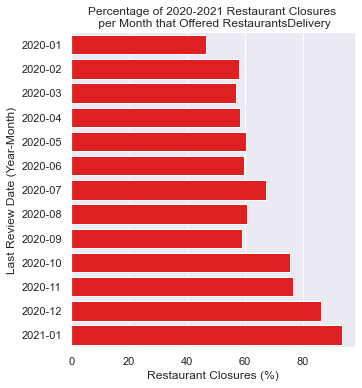

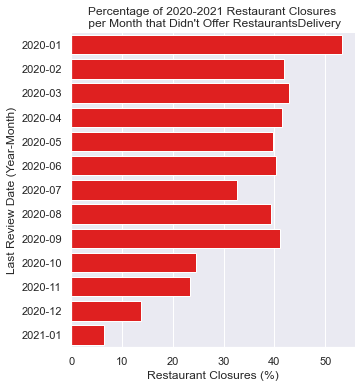

In [78]:
compareAttributeClosuresTot(bus_rev_attributes, "RestaurantsDelivery")

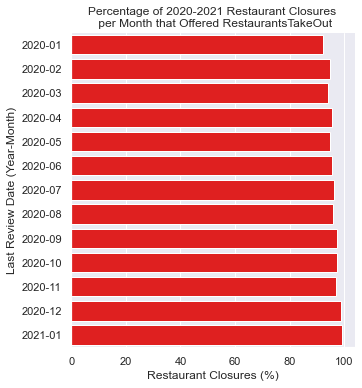

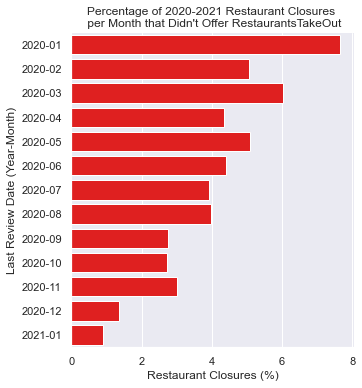

In [79]:
compareAttributeClosuresTot(bus_rev_attributes, "RestaurantsTakeOut")

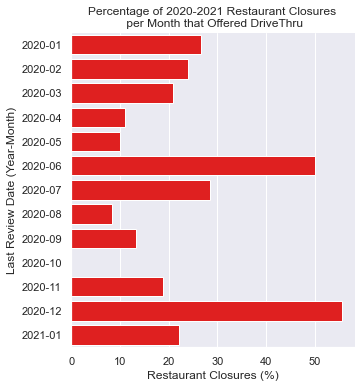

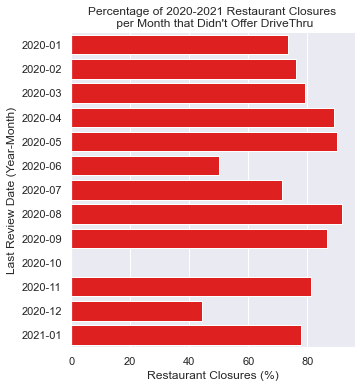

In [80]:
compareAttributeClosuresTot(bus_rev_attributes, "DriveThru")

# Review Data

In [3]:
# REVIEW DATA

# Read json file in chunks to prevent a memory error
review_json_path = 'yelp_academic_dataset_review.json'
size = 1000000

review = pd.read_json(review_json_path, lines=True,
                      dtype={'review_id':str,'user_id':str,
                             'business_id':str,'stars':int,
                             'date':str,'text':str,'useful':int,
                             'funny':int,'cool':int},
                      chunksize=size)

# Strip unnecessary data from each data chunk and add to list
chunk_list = []
for chunk_review in review:
    # Drop columns that aren't needed
    chunk_review = chunk_review.drop(['review_id','user_id','stars','text','useful','funny','cool'], axis=1)
    chunk_list.append(chunk_review)
    
# Concatenate data
review = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)

review.head()

MemoryError: 

# Restaurants Data for 2020 and 2021

In [19]:
# CLEANED AND MERGED DATA OF RESTAURANTS IN 2020 AND 2021

# Only keep reviews that are from 2020 and 2021
review_ur = review[review['date'].str.contains('2020') | review['date'].str.contains('2021')].copy()
# Change review date type from string to date time
review_ur['date'] = review_ur['date'].astype("datetime64")
# Add year and month columns
review_ur['month-year'] = pd.to_datetime(review_ur['date']).dt.to_period('M')

# Merge the business and review datasets using business ID to identify all restaurants have reviews in 2020 and 2021
bus_rev = pd.merge(business, review_ur, on='business_id')
bus_rev = bus_rev.sort_values(by=['date'])
# Remove duplicates of restaurants and make each row's date the last review date for each unique business ID
bus_unique = bus_rev.groupby('business_id').last()

bus_unique.head()

state  is_open  \
business_id                             
--Q3mAcX9t63f7Xcbn7LVA    OH        1   
--UNNdnHRhsyFUbDgumdtQ    OR        1   
-00d-Qb0q2TcWn-8LBHDZg    MA        1   
-0JXXCMUpe29dQ-f6pG9OA    GA        1   
-0OWS89ebRdvzOQkjptyEw    GA        1   

                                                               attributes  \
business_id                                                                 
--Q3mAcX9t63f7Xcbn7LVA  {'Ambience': '{'touristy': False, 'hipster': F...   
--UNNdnHRhsyFUbDgumdtQ  {'RestaurantsPriceRange2': '3', 'BusinessParki...   
-00d-Qb0q2TcWn-8LBHDZg  {'RestaurantsAttire': 'u'casual'', 'Alcohol': ...   
-0JXXCMUpe29dQ-f6pG9OA  {'GoodForKids': 'True', 'BusinessAcceptsCredit...   
-0OWS89ebRdvzOQkjptyEw  {'BikeParking': 'False', 'DriveThru': 'False',...   

                                                               categories  \
business_id                                                                 
--Q3mAcX9t63f7Xcbn7LVA    American (Traditional), Restaurants, Gastropubs   
--UNNdnHRhsyFUbDgumdtQ                French, Restaurants, American (New)   
-00d-Qb0q2TcWn-8LBHDZg  Food Trucks, Food, Street Vendors, Food Stands...   
-0JXXCMUpe29dQ-f6pG9OA  Food, Restaurants, Juice Bars & Smoothies, Hea...   
-0OWS89ebRdvzOQkjptyEw                               Restaurants, Burgers   

                                      date month-year  
business_id                                            
--Q3mAcX9t63f7Xcbn7LVA 2021-01-27 02:15:07    2021-01  
--UNNdnHRhsyFUbDgumdtQ 2020-12-17 17:35:28    2020-12  
-00d-Qb0q2TcWn-8LBHDZg 2021-01-22 14:07:27    2021-01  
-0JXXCMUpe29dQ-f6pG9OA 2020-06-02 23:24:14    2020-06  
-0OWS89ebRdvzOQkjptyEw 2020-11-22 15:33:49    2020-11

In [1]:
bus_unique["attributes"]

NameError: name 'bus_unique' is not defined

In [20]:
# Total number of restaurants that were open in 2020/2021 are still open or no longer open

is_open = bus_unique.groupby('is_open').count()
is_open

state  attributes  categories   date  month-year
is_open                                                  
0         1838        1831        1838   1838        1838
1        24758       24556       24758  24758       24758

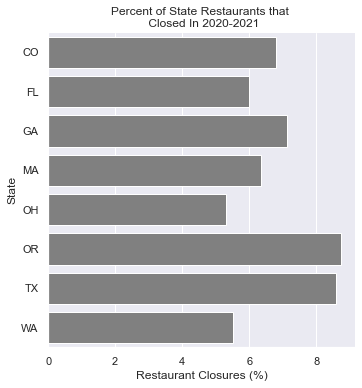

In [21]:
# Percent of restaurant closures per state in 2020/2021

# Divide num of closed restaurants in each s by total restaurants in each state
group_state = bus_unique.groupby('state').count()
closed_state = bus_unique[bus_unique['is_open'] == 0].groupby('state').count()
closed = (closed_state / group_state) * 100

# Merge dataset to make data workable, then visualize data
closed.reset_index(inplace=True)
pc_plt = sns.catplot(data= closed.dropna(), x="is_open", y="state", height= 5, color = "gray", kind="bar")
pc_plt.set(xlabel='Restaurant Closures (%)', ylabel='State', title='Percent of State Restaurants that \n Closed In 2020-2021')

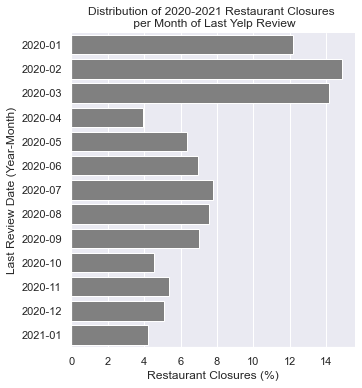

In [22]:
# Percent of closures per month of last review

group_date = len(bus_unique[bus_unique['is_open'] == 0])
closed_date = bus_unique[bus_unique['is_open'] == 0].groupby('month-year').count()
closed = (closed_date / group_date) * 100

closed.reset_index(inplace=True)
c = sns.catplot(data= closed, x="is_open", y="month-year", height= 5, color = "gray", kind="bar")
c.set(xlabel='Restaurant Closures (%)', ylabel='Last Review Date (Year-Month)', title='Distribution of 2020-2021 Restaurant Closures \n per Month of Last Yelp Review')

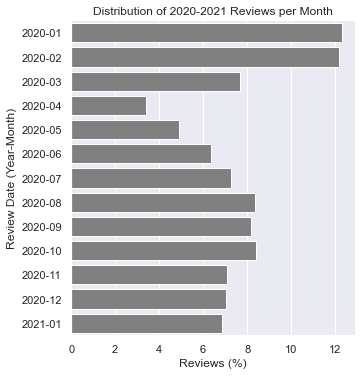

In [28]:
# Percent of reviews per month
tot_revs = len(bus_rev)
group_num = bus_rev.groupby('month-year').count()
group_num = (group_num / tot_revs) * 100
group_num.reset_index(inplace=True)

n = sns.catplot(data= group_num, x="date", y="month-year", height= 5, color = "gray", kind="bar")
n.set(xlabel='Reviews (%)', ylabel='Review Date (Year-Month)', title='Distribution of 2020-2021 Reviews per Month')

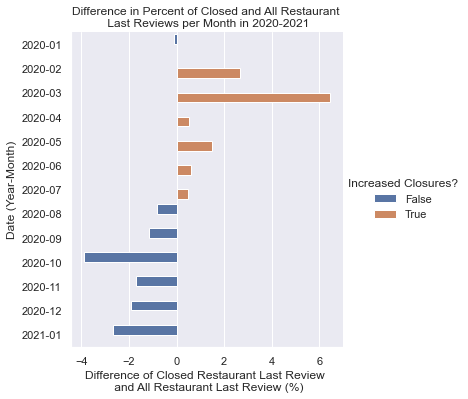

In [26]:
# Percent diff between the closed last review distribution and total review distribution
group_num['dif'] = closed['date'] - group_num['date']
group_num['Increased Closures?'] = group_num['dif'] > 0

n = sns.catplot(data= group_num, x="dif", y="month-year", height= 5, hue ="Increased Closures?", kind="bar")
n.set(xlabel='Difference of Closed Restaurant Last Review \n and All Restaurant Last Review (%)', ylabel='Date (Year-Month)', title='Difference in Percent of Closed and All Restaurant \n Last Reviews per Month in 2020-2021')

# Restaurant Data for 2019

In [10]:
# MERGED DATA OF RESTAURANTS IN 2019

# Only keep reviews that are from 2019, 2020, or 2021
review_ur = review[review['date'].str.contains('2019') | review['date'].str.contains('2020') | review['date'].str.contains('2021')].copy()
# Change review date type from string to date time
review_ur['date'] = review_ur['date'].astype("datetime64")
# Add year and month columns
review_ur['month-year'] = pd.to_datetime(review_ur['date']).dt.to_period('M')
# Merge the business and review datasets using business ID to identify all restaurants have reviews in 2019, 2020, or 2021
bus_rev = pd.merge(business, review_ur, on='business_id')
bus_rev = bus_rev.sort_values(by=['date'])
# Remove duplicates of restaurants and make each row's date the last review date for each unique business ID
bus_unique = bus_rev.groupby('business_id').last()

bus_unique.head()

state  is_open  \
business_id                             
--Q3mAcX9t63f7Xcbn7LVA    OH        1   
--UNNdnHRhsyFUbDgumdtQ    OR        1   
-00d-Qb0q2TcWn-8LBHDZg    MA        1   
-0A60UZl9nbdq2WWySJ_tQ    FL        0   
-0JXXCMUpe29dQ-f6pG9OA    GA        1   

                                                               attributes  \
business_id                                                                 
--Q3mAcX9t63f7Xcbn7LVA  {'Ambience': '{'touristy': False, 'hipster': F...   
--UNNdnHRhsyFUbDgumdtQ  {'RestaurantsPriceRange2': '3', 'BusinessParki...   
-00d-Qb0q2TcWn-8LBHDZg  {'RestaurantsAttire': 'u'casual'', 'Alcohol': ...   
-0A60UZl9nbdq2WWySJ_tQ  {'Ambience': '{'romantic': False, 'intimate': ...   
-0JXXCMUpe29dQ-f6pG9OA  {'GoodForKids': 'True', 'BusinessAcceptsCredit...   

                                                               categories  \
business_id                                                                 
--Q3mAcX9t63f7Xcbn7LVA    American (Traditional), Restaurants, Gastropubs   
--UNNdnHRhsyFUbDgumdtQ                French, Restaurants, American (New)   
-00d-Qb0q2TcWn-8LBHDZg  Food Trucks, Food, Street Vendors, Food Stands...   
-0A60UZl9nbdq2WWySJ_tQ            Restaurants, Breakfast & Brunch, Diners   
-0JXXCMUpe29dQ-f6pG9OA  Food, Restaurants, Juice Bars & Smoothies, Hea...   

                                      date month-year  
business_id                                            
--Q3mAcX9t63f7Xcbn7LVA 2021-01-27 02:15:07    2021-01  
--UNNdnHRhsyFUbDgumdtQ 2020-12-17 17:35:28    2020-12  
-00d-Qb0q2TcWn-8LBHDZg 2021-01-22 14:07:27    2021-01  
-0A60UZl9nbdq2WWySJ_tQ 2019-10-23 21:56:53    2019-10  
-0JXXCMUpe29dQ-f6pG9OA 2020-06-02 23:24:14    2020-06

In [11]:
# CLEANED DATA OF RESTAURANTS IN 2019

# Get restaurants whos last review was in 2019 and are now closed, presumed closed in 2019
closed_2019 = bus_unique[(bus_unique['date'] < pd.to_datetime('2020-01-01 00:00:00')) & (bus_unique['is_open'] == 0)]

# Get reviews for businesses that had reviews in 2019 and 2020/2021
open_2019 = review_ur.groupby('business_id').agg([np.min, np.max])['month-year']
open_2019 = open_2019[(open_2019['amin'] < pd.Period('2020-01')) & (open_2019['amax'] >= pd.Period('2020-01'))]
open_2019.reset_index(inplace=True)
open_2019 = pd.merge(review_ur, open_2019, how="inner")
open_2019 = open_2019.drop(['amin','amax'], axis=1)

# Merge reviews of businesses that had reviews in 2019 and 2020/2021 with restaurant business data
open_2019 = pd.merge(open_2019, business, on='business_id')
# Change is_open to 1 because restaurant must have been open thru all of 2019 given it had reviews in 2020/2021
open_2019 = open_2019.replace(0, 1)
# Only keep 2019 reviews
open_revs = open_2019[open_2019['month-year'] < pd.Period('2020-01')]
open_revs = open_revs.sort_values(by=['date'])
# Remove duplicates of restaurants and make each row's date the last review date for each unique business ID
open_2019_u = open_revs.groupby('business_id').last()

# Get reviews for businesses that had reviews in 2019 only
closed = review_ur.groupby('business_id').max()
closed = closed[closed['month-year'] < pd.Period('2020-01')]
closed.reset_index(inplace=True)
closed = pd.merge(review_ur, closed, how="inner")

# Merge reviews of businesses that had reviews in 2019 with restaurant business data to get reviews for closed restaurants
closed = pd.merge(business, closed, on='business_id')
closed_revs = closed[closed['is_open'] == 0]

# Merge open 2019 restaurant data with closed 2019 data to get all restaurant data for 2019
bus_unique = pd.concat([open_2019_u, closed_2019], axis=0)

bus_unique.head()

date month-year state  is_open  \
business_id                                                            
--UNNdnHRhsyFUbDgumdtQ 2019-12-12 23:20:34    2019-12    OR        1   
-00d-Qb0q2TcWn-8LBHDZg 2019-08-30 17:20:19    2019-08    MA        1   
-0JXXCMUpe29dQ-f6pG9OA 2019-10-21 20:27:12    2019-10    GA        1   
-0OWS89ebRdvzOQkjptyEw 2019-07-10 00:15:36    2019-07    GA        1   
-0P5rq9DlJgXnfB320Fx9w 2019-12-07 03:44:15    2019-12    TX        1   

                                                               attributes  \
business_id                                                                 
--UNNdnHRhsyFUbDgumdtQ  {'RestaurantsPriceRange2': '3', 'BusinessParki...   
-00d-Qb0q2TcWn-8LBHDZg  {'RestaurantsAttire': 'u'casual'', 'Alcohol': ...   
-0JXXCMUpe29dQ-f6pG9OA  {'GoodForKids': 'True', 'BusinessAcceptsCredit...   
-0OWS89ebRdvzOQkjptyEw  {'BikeParking': 'False', 'DriveThru': 'False',...   
-0P5rq9DlJgXnfB320Fx9w  {'RestaurantsPriceRange2': '1', 'RestaurantsTa...   

                                                               categories  
business_id                                                                
--UNNdnHRhsyFUbDgumdtQ                French, Restaurants, American (New)  
-00d-Qb0q2TcWn-8LBHDZg  Food Trucks, Food, Street Vendors, Food Stands...  
-0JXXCMUpe29dQ-f6pG9OA  Food, Restaurants, Juice Bars & Smoothies, Hea...  
-0OWS89ebRdvzOQkjptyEw                               Restaurants, Burgers  
-0P5rq9DlJgXnfB320Fx9w                          Asian Fusion, Restaurants

In [12]:
# Total number of restaurants that were open in 2019 but closed before the year finished
is_open = bus_unique.groupby('is_open').count()
is_open

date  month-year  state  attributes  categories
is_open                                                  
0         1884        1884   1884        1877        1884
1        24550       24550  24550       24461       24550

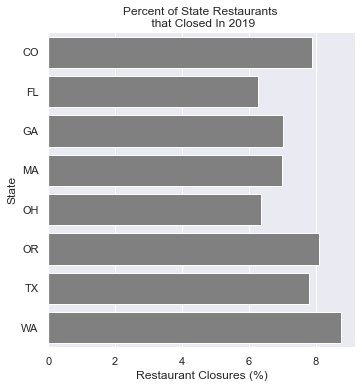

In [17]:
# Percent of restaurant closures per state in 2019

# Divide num of closed restaurants by total restaurants in each state
group_state = bus_unique.groupby('state').count()
closed_state = bus_unique[bus_unique['is_open'] == 0].groupby('state').count()
closed = (closed_state / group_state) * 100

# Merge dataset to make data workable, then visualize data
closed.reset_index(inplace=True)
pc_plt = sns.catplot(data= closed.dropna(), x="is_open", y="state", height= 5, color = "gray", kind="bar")
pc_plt.set(xlabel='Restaurant Closures (%)', ylabel='State', title='Percent of State Restaurants \n that Closed In 2019')

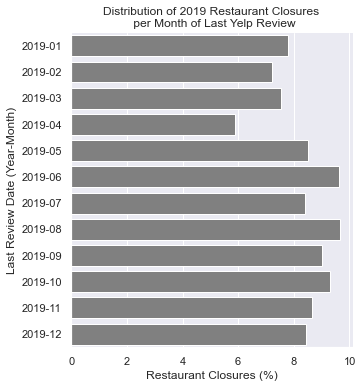

In [14]:
# Percent of 2019 closures per month of last review

group_date = len(bus_unique[bus_unique['is_open'] == 0])
closed_date = bus_unique[bus_unique['is_open'] == 0].groupby('month-year').count()
closed = (closed_date / group_date) * 100

closed.reset_index(inplace=True)
c = sns.catplot(data= closed, x="is_open", y="month-year", height= 5, color = "gray", kind="bar")
c.set(xlabel='Restaurant Closures (%)', ylabel='Last Review Date (Year-Month)', title='Distribution of 2019 Restaurant Closures \n per Month of Last Yelp Review')

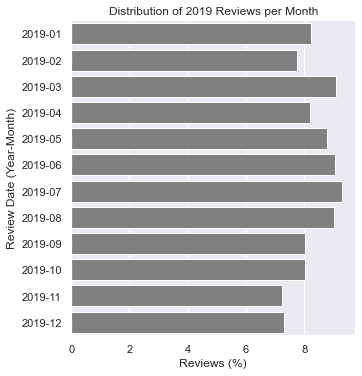

In [15]:
# Percent of reviews per month
tot_revs = len(closed_revs) + len(open_revs)
group_num = open_revs.groupby('month-year').count() + closed_revs.groupby('month-year').count()
group_num = (group_num / tot_revs) * 100
group_num = group_num.dropna()
group_num.reset_index(inplace=True)

n = sns.catplot(data= group_num, x="date", y="month-year", height= 5, color = "gray", kind="bar")
n.set(xlabel='Reviews (%)', ylabel='Review Date (Year-Month)', title='Distribution of 2019 Reviews per Month')

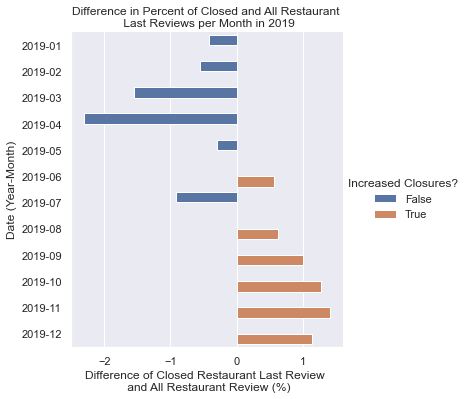

In [16]:
# Percent diff between the closed last review distribution and total review distribution
group_num['dif'] = closed['date'] - group_num['date']
group_num['Increased Closures?'] = group_num['dif'] > 0

n = sns.catplot(data= group_num, x="dif", y="month-year", height= 5, hue ="Increased Closures?", kind="bar")
n.set(xlabel='Difference of Closed Restaurant Last Review \n and All Restaurant Review (%)', ylabel='Date (Year-Month)', title='Difference in Percent of Closed and All Restaurant \n Last Reviews per Month in 2019')